In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from sklearn import metrics


In [4]:
SIZE = 64
train_images = []
train_labels = []
image_extensions = ["*.jpg", "*.jpeg", "*.png", "*.bmp"]


In [5]:
train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Fruit_Vegetable_Recognition/train/*"):
    label = os.path.basename(directory_path)
    for extension in image_extensions:
        for img_path in glob.glob(os.path.join(directory_path,extension)):
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is None:
                print(f"Could not read image: {img_path}")
                continue
            img = cv2.resize(img, (SIZE,SIZE))
            train_images.append(img)
            train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

Could not read image: /content/drive/MyDrive/Fruit_Vegetable_Recognition/train/bell pepper/Image_56.jpg


In [6]:
validation_images = []
validation_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation/*"):
    fruit_label = os.path.basename(directory_path)
    for extension in image_extensions:
        for img_path in glob.glob(os.path.join(directory_path, extension)):
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is None:
                print(f"Could not read image: {img_path}")
                continue
            img = cv2.resize(img, (SIZE,SIZE))
            validation_images.append(img)
            validation_labels.append(fruit_label)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

In [7]:
test_images = []
test_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Fruit_Vegetable_Recognition/test/*"):
    fruit_label = os.path.basename(directory_path)
    for extension in image_extensions:
        for img_path in glob.glob(os.path.join(directory_path, extension)):
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is None:
                print(f"Could not read image: {img_path}")
                continue
            img = cv2.resize(img, (SIZE, SIZE))
            test_images.append(img)
            test_labels.append(fruit_label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
validation_labels_encoded = le.transform(validation_labels)

train_labels_encoded = le.transform(train_labels)
test_labels_encoded = le.transform(test_labels)

In [9]:
x_train, y_train,x_val,y_val, x_test, y_test = train_images, train_labels_encoded, validation_images, validation_labels_encoded,test_images, test_labels_encoded

In [10]:
x_train,x_val, x_test = x_train / 255.0, x_val/ 255.0, x_test / 255.0

In [11]:
def feature_extractor(dataset):

    image_datasets = []
    for image in range(dataset.shape[0]):

        df = pd.DataFrame()

        input_img = dataset[image, :,:,:]
        img = input_img

        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values
        num = 1
        kernels = []
        for theta in range(2):
            theta = theta / 4. * np.pi
            for sigma in (1, 3):
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1


        image_datasets.append(df)
    image_dataset = pd.concat(image_datasets, ignore_index=True)

    return image_dataset



In [12]:
train_features = feature_extractor(x_train)
val_features = feature_extractor(x_val)
test_features = feature_extractor(x_test)

print("Shape of train_features before reshaping:", train_features.shape)
print("Shape of val_features before reshaping:", val_features.shape)
print("Shape of test_features before reshaping:", test_features.shape)


train_features = np.expand_dims(train_features, axis=0)
val_features = np.expand_dims(val_features, axis=0)
test_features = np.expand_dims(test_features, axis=0)


print("Shape of train_features after expanding dims:", train_features.shape)
print("Shape of val_features after expanding dims:", val_features.shape)
print("Shape of test_features after expanding dims:", test_features.shape)

train_features = np.reshape(train_features, (x_train.shape[0], -1))
val_features = np.reshape(val_features, (x_val.shape[0], -1))
test_features = np.reshape(test_features, (x_test.shape[0], -1))

print("Shape of train_features after reshaping:", train_features.shape)
print("Shape of val_features after reshaping:", val_features.shape)
print("Shape of test_features after reshaping:", test_features.shape)


Streaming output truncated to the last 5000 lines.
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma=

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [14]:
import joblib
RF_model.fit(train_features, y_train)
joblib.dump(RF_model, 'rf_trained_model.joblib')

['rf_trained_model.joblib']

In [15]:
val_predictions = RF_model.predict(val_features)
val_accuracy = metrics.accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9623188405797102


In [16]:
test_predictions = RF_model.predict(test_features)
test_accuracy = metrics.accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9473684210526315


In [20]:
train_predictions = RF_model.predict(train_features)
train_accuracy = metrics.accuracy_score(y_train, train_predictions)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.9940769990128332


The actual label for this image is:  spinach


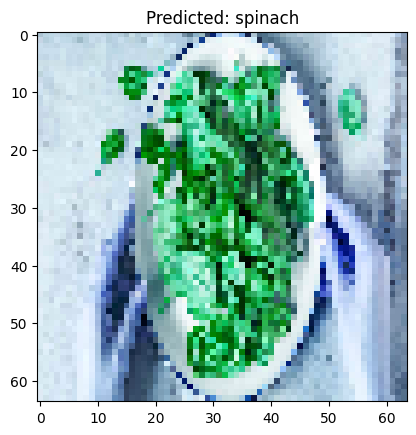

In [17]:
import random
n=random.randint(0, x_test.shape[0]-1)
img = x_test[n]
plt.title(f"Predicted: {le.inverse_transform([test_predictions[n]])[0]}")
print("The actual label for this image is: ", test_labels[n])
plt.imshow(img)


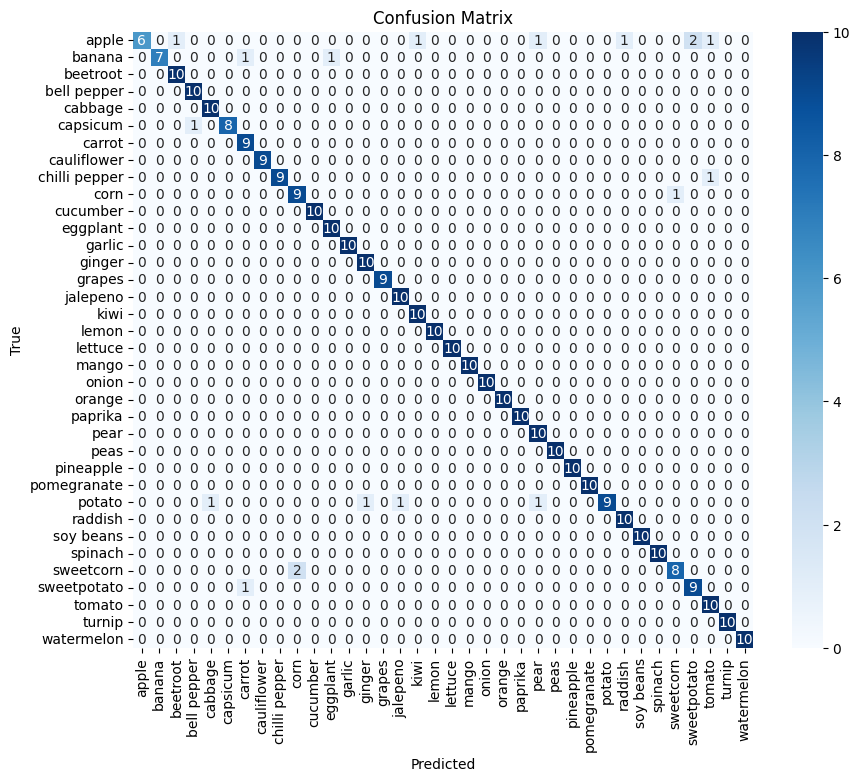

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = RF_model.predict(test_features)
y_test = le.transform(test_labels)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=le.classes_)

print("Classification Report:")
print(report)


Classification Report:
               precision    recall  f1-score   support

        apple       1.00      0.46      0.63        13
       banana       1.00      0.78      0.88         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.91      1.00      0.95        10
      cabbage       0.91      1.00      0.95        10
     capsicum       1.00      0.89      0.94         9
       carrot       0.82      1.00      0.90         9
  cauliflower       1.00      1.00      1.00         9
chilli pepper       1.00      0.90      0.95        10
         corn       0.82      0.90      0.86        10
     cucumber       1.00      1.00      1.00        10
     eggplant       0.91      1.00      0.95        10
       garlic       1.00      1.00      1.00        10
       ginger       0.91      1.00      0.95        10
       grapes       1.00      1.00      1.00         9
     jalepeno       0.91      1.00      0.95        10
         kiwi       0.91      1.00      0